# 3D Transformation Matrices
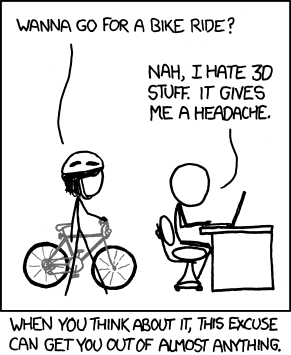
https://xkcd.com/880/

In [1]:
# Preparation
import numpy as np
np.set_printoptions(precision = 4, suppress = True)
import matplotlib.pyplot as plt
import ipywidgets

from mpl_toolkits.mplot3d import Axes3D
# This function is only needed to visualize equal axes on 3D plots
# From: https://stackoverflow.com/a/31364297
def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    '''

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

Definition of 3D pure translation and pure rotation matrices.  See https://en.wikipedia.org/wiki/Rotation_matrix
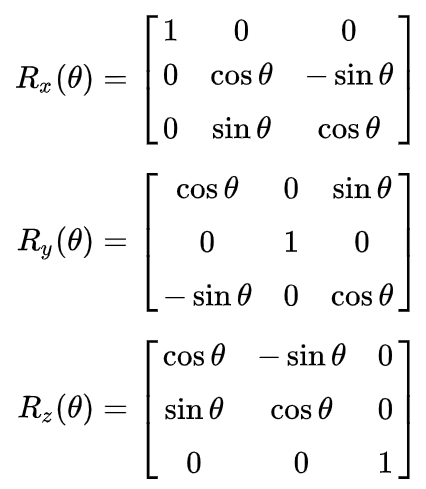.

The matrices we build below are in homogeneous coordinates, i.e. they are $4 \times 4$, their last row is $[0,0,0,1]$, and are desigened to operate on points defined as column vectors with 4 elements: $[x,y,z,1]^\top$.  The rotation matrices defined in wikipedia are in the top $3\times3$ submatrix.

In [2]:
def mk3dtr(x, y, z): # pure translation
    ret = np.eye(4)
    ret[0:3,3] = x,y,z
    return ret

def mk3drotx(theta): # pure rotation around x axis
    ret = np.eye(4)
    ret[1,[1,2]]=[np.cos(theta),-np.sin(theta)]
    ret[2,[1,2]]=[np.sin(theta), np.cos(theta)]
    return ret

def mk3droty(theta): # pure rotation around y axis
    ret = np.eye(4)
    ret[0,[0,2]]=[np.cos(theta),np.sin(theta)]
    ret[2,[0,2]]=[-np.sin(theta), np.cos(theta)]
    return ret

def mk3drotz(theta): # pure rotation around z axis
    ret = np.eye(4)
    ret[0,[0,1]]=[np.cos(theta),-np.sin(theta)]
    ret[1,[0,1]]=[np.sin(theta), np.cos(theta)]
    return ret

We can now draw frames in 3D.  Using `%matplotlib notebook` yields an interactive plot that can be rotated in 3D.

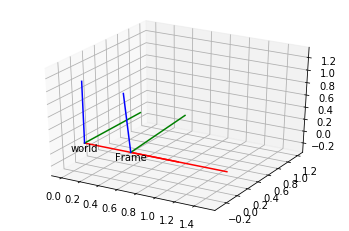

In [3]:
#%matplotlib notebook
# Useful to rotate 3D plots

def draw3df(f, ax, name = None):
    """ Draw 3d frame defined by f on axis ax (if provided) or on a new axis otherwise """
    xhat = f @ np.array([[0,0,0,1],[1,0,0,1]]).T
    yhat = f @ np.array([[0,0,0,1],[0,1,0,1]]).T
    zhat = f @ np.array([[0,0,0,1],[0,0,1,1]]).T
    ax.plot(xhat[0,:],xhat[1,:],xhat[2,:],'r-') # transformed x unit vector
    ax.plot(yhat[0,:],yhat[1,:],yhat[2,:],'g-') # transformed y unit vector
    ax.plot(zhat[0,:],zhat[1,:],zhat[2,:],'b-') # transformed z unit vector
    if(name):
        ax.text(xhat[0,0],xhat[1,0],xhat[2,0],name,va="top",ha="center")

fig,ax = plt.subplots(subplot_kw=dict(projection='3d'))
draw3df(np.eye(4),ax,"world")
draw3df(mk3dtr(0.5,0,0) @ mk3drotx(0.1),ax,"Frame")
set_axes_equal(ax)

To make it a little more fun, we draw a little airplane instead of a frame, and experiment with yaw, pitch and roll for 3D rotations.

In [4]:
def draw3dairplane(f, ax):
    """ Draw a small 3D airplane at 3D pose f """
    # Airplane shape
    #             Fuselage......       Wings.........
    airplane = ([[0, 5, 4, 2, 1, 0, 0, 3, 2, 1, 1, 2, 3],  # x
                 [0, 0, 0, 0, 0, 0, 0, 0, 2, 2,-2,-2, 0],  # y
                 [0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0]]) # z
    airplane = np.array(airplane)
    airplane = np.vstack((
        airplane * 0.1, # scale by 0.1 units
        np.ones((1,airplane.shape[1]))))
    airplanet = f @ airplane # transform according to f
    ax.plot(airplanet[0,:],airplanet[1,:],airplanet[2,:],'k-')

@ipywidgets.interact(
    yaw = ipywidgets.FloatSlider(min=-np.pi,  max=np.pi,  value=0),
    pitch = ipywidgets.FloatSlider(min=-np.pi,max=np.pi,  value=0),
    roll = ipywidgets.FloatSlider(min=-np.pi, max=np.pi,  value=0))
def draw(yaw,pitch,roll):
    fig,ax = plt.subplots(subplot_kw=dict(projection='3d'))
    draw3df(np.eye(4),ax,"world")
    draw3dairplane(mk3drotz(yaw) @ mk3droty(pitch) @ mk3drotx(roll),ax)
    set_axes_equal(ax)    

interactive(children=(FloatSlider(value=0.0, description='yaw', max=3.141592653589793, min=-3.141592653589793)…

... and let's chain the same transform several times, as we did in the 2D case.

In [5]:
@ipywidgets.interact(
    x = ipywidgets.FloatSlider(min=-2,max=+2,value=0),
    y = ipywidgets.FloatSlider(min=-2,max=+2,value=0),
    z = ipywidgets.FloatSlider(min=-2,max=+2,value=0),
    yaw = ipywidgets.FloatSlider(min=-np.pi,max=np.pi,value=0),
    pitch = ipywidgets.FloatSlider(min=-np.pi,max=np.pi,value=0),
    roll = ipywidgets.FloatSlider(min=-np.pi,max=np.pi,value=0), 
    N = ipywidgets.IntSlider(min=1,max=20,value=5))
def f(x,y,z,yaw,pitch,roll,N):
    fig,ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(18,8))
    T = mk3dtr(x,y,z) @ mk3drotz(yaw) @ mk3droty(pitch) @ mk3drotx(roll)
    cT = np.eye(4)
    draw3df(cT,ax,"World")
    for i in range(N):
        draw3dairplane(cT,ax)
        cT = cT @ T
    ax.set(xlabel="$x$",
           ylabel="$y$",
           zlabel="$z$")
    set_axes_equal(ax)

interactive(children=(FloatSlider(value=0.0, description='x', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

You should now have all the pieces you need to build the fw kinematics of a 3D robot.  Pick your favorite manipulator and model it like we did in the 2D case.

For example:
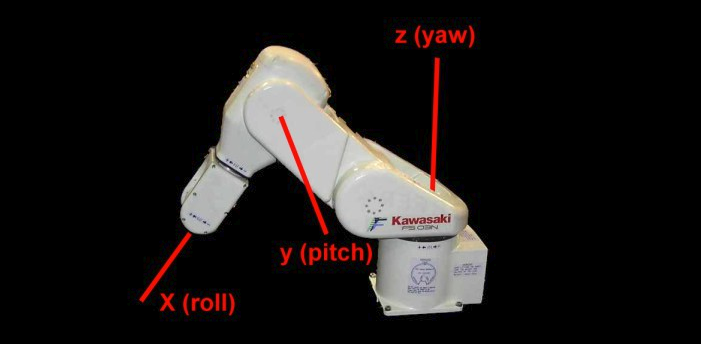
https://commons.wikimedia.org/wiki/Category:Industrial_robots#/media/File:Rollpitchyawrob.jpg